# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np



Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='Reacher.app')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='Reacher-Multi.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from rllib.agents import ActorCriticAgent
from rllib.models import QSequentialMLPModel

seed = 117  
agent = ActorCriticAgent(state_size, 
                 action_size, 
                 model_class_dict= {"model_class":QSequentialMLPModel, 
                                    'actor_hidden_layers':[128, 64, 32],
                                   'critic_hidden_layers':[128, 64, 32],
                                   'critic_input_layer':1}, 
                    agent_params ={'n_agents':num_agents},rnd=seed)        
        


Using: cpu


In [6]:
def train(n_episodes=1000, ep_max_time=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    eps = eps_start                    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        #print(state.shape)
        score = np.zeros(num_agents)
        for t in range(ep_max_time):
            action = agent.predict(state, epsilon=eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            
            done = env_info.local_done
            #print(reward, done)
            agent.step(state, action, next_state, reward, done)
            state = next_state
            score += reward

            if np.any(done):
                break 
                
        scores.append(np.mean(score))
        eps = max(eps_end, eps_decay*eps)
        print('Episode:', i_episode, ' Score:', np.mean(scores[-100:]))
        
        if np.mean(scores[-100:])>= 30.0:
            print('Solved!!! Episodes:', i_episode, ' Score:', np.mean(scores[-100:]))
            agent.save()
            break
    return scores

In [7]:
scores = train()

Episode: 1  Score: 0.1834999958984554
Episode: 2  Score: 0.15749999647960067
Episode: 3  Score: 0.1338333303419252
Episode: 4  Score: 0.12799999713897706
Episode: 5  Score: 0.11019999753683807
Episode: 6  Score: 0.10924999755807223
Episode: 7  Score: 0.10499999765306713
Episode: 8  Score: 0.1312499970663339
Episode: 9  Score: 0.13233333037545283
Episode: 10  Score: 0.1390499968919903
Episode: 11  Score: 0.136318178771233
Episode: 12  Score: 0.1503749966388568
Episode: 13  Score: 0.15426922732104476
Episode: 14  Score: 0.15346428228409165
Episode: 15  Score: 0.14673333005358777
Episode: 16  Score: 0.1507187466311734
Episode: 17  Score: 0.14973529077080242
Episode: 18  Score: 0.16288888524803846
Episode: 19  Score: 0.16234210163452906
Episode: 20  Score: 0.165049996310845
Episode: 21  Score: 0.1674285676862512
Episode: 22  Score: 0.16654545082287353
Episode: 23  Score: 0.17402173524074577
Episode: 24  Score: 0.17618749606190245
Episode: 25  Score: 0.19521999563649295
Episode: 26  Score: 

Episode: 211  Score: 23.455974475718108
Episode: 212  Score: 23.63518447171245
Episode: 213  Score: 23.784639468371864
Episode: 214  Score: 23.919169465364885
Episode: 215  Score: 24.062784462154838
Episode: 216  Score: 24.229989458417517
Episode: 217  Score: 24.384474454964508
Episode: 218  Score: 24.502184452333484
Episode: 219  Score: 24.628779449503874
Episode: 220  Score: 24.76408444647956
Episode: 221  Score: 24.914979443106798
Episode: 222  Score: 25.04822944012843
Episode: 223  Score: 25.17647443726193
Episode: 224  Score: 25.271319435141983
Episode: 225  Score: 25.404759432159363
Episode: 226  Score: 25.53531942924112
Episode: 227  Score: 25.660564426441674
Episode: 228  Score: 25.793534423469563
Episode: 229  Score: 25.893214421241545
Episode: 230  Score: 26.024289418311792
Episode: 231  Score: 26.114319416299463
Episode: 232  Score: 26.238149413531644
Episode: 233  Score: 26.405369409793988
Episode: 234  Score: 26.500814407660624
Episode: 235  Score: 26.623114404927005
Episo

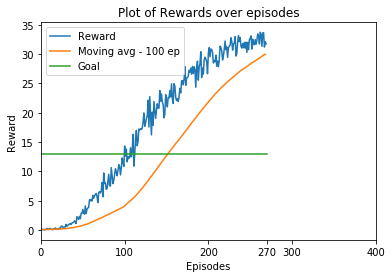

In [8]:
cum_score = []
for i in range(1,min(len(scores), 100)):
    cum_score.append(np.mean(scores[:i]))
    
for i in range(100, len(scores)):
    cum_score.append(np.mean(scores[i-100:i]))
                     
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scores)
plt.plot(cum_score)
plt.plot(np.linspace(0, len(scores), len(scores)+1), np.ones(len(scores)+1) * 13)

plt.xlim(0, len(scores)+1)
plt.xticks([0,100,200,300,400,len(scores)])
plt.title('Plot of Rewards over episodes')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend(["Reward", "Moving avg - 100 ep", "Goal"])
plt.show()

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores_test = np.zeros(num_agents)                          # initialize the score (for each agent)
agent.load()
while True:
    actions = agent.predict(states, False)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores_test += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break